In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import re

COM_TITULO = False
MENOS_MISTERIOSO = '−'

def ler_arq_proj(caminho_csv, tamanho_rodape=6, tamanho_preambulo=3):
  return pd.read_csv(caminho_csv,
                    encoding='iso-8859-1',
                    skiprows=tamanho_preambulo,
                    skipfooter=tamanho_rodape,
                    sep=';',
                    engine='python')

def map_classes_abaixo_20_anos(classe):
  if (' a ' in classe):
    return classe

  idade = re.sub(r'\D+', '', classe)
  if not idade.isdigit():
    return classe

  idade = int(idade)

  map_classes = {
      (lambda x: x < 5): '0 a 4 anos',
      (lambda x: 5 <= x < 10): '5 a 9 anos',
      (lambda x: 10 <= x < 15): '10 a 14 anos',
      (lambda x: 15 <= x < 20): '15 a 19 anos',
  }

  return next((
        nova_classe
        for cond, nova_classe in map_classes.items()
        if cond(idade)
      ), classe)

def map_classes_para_grandes_grupos(classe):
  classes_jovens = ['0 a 4 anos', '5 a 9 anos', '10 a 14 anos']
  classes_idosos = ['65 a 69 anos', '70 a 74 anos', '75 a 79 anos', '80 anos e mais']

  if classe in classes_jovens:
    return 'Jovem'

  if classe in classes_idosos:
    return 'Idoso'

  return 'PIA'

## Índice de Whipple

In [17]:
def calcular_indice_whipple(df):
  FATOR_WHIPPLE = 5 * 100

  def condicao_idade(idade):
    return idade >= 23 and idade <=62

  df['Idade simples'] = df['Idade simples'].astype(str).str.replace(r'\D+', '', regex=True)

  df_filtrado = df[df['Idade simples'].apply(lambda x : x.isdigit() and condicao_idade(int(x)))]
  df_filtrado.loc[:, 'Idade simples'] = df_filtrado['Idade simples'].astype(int)
  idades_multiplas_5 = df_filtrado[df_filtrado['Idade simples'].apply(lambda x : (x % 5 == 0))]

  return ((idades_multiplas_5['Total'].sum() / df_filtrado['Total'].sum()) * FATOR_WHIPPLE)

def obter_confiabilidade_whipple(indice):
  tabela = {
      (lambda x: x < 105) : 'Excelente',
      (lambda x: 105 <= x < 105): 'Ótima',
      (lambda x: 110 <= x < 125): 'Razoável',
      (lambda x: 125 <= x < 175): 'Ruim',
      (lambda x: x >= 175): 'Péssima',
  }
  for teste,nivel in tabela.items():
    if teste(indice):
      return nivel

df = ler_arq_proj('/content/drive/MyDrive/Técnicas demográficas/ibge_reproj_2010.csv')
indice_whipple_2010 = calcular_indice_whipple(df)
print('Índice de whipple para o arquivo os dados de SC no ano de 2010 é => ' + str(indice_whipple_2010))
print('O grau de confiabilidade desses dados é => ' + obter_confiabilidade_whipple(indice_whipple_2010))

Índice de whipple para o arquivo os dados de SC no ano de 2010 é => 100.05352350805602
O grau de confiabilidade desses dados é => Excelente


## DF de 2010

In [3]:
df = ler_arq_proj('/content/drive/MyDrive/Técnicas demográficas/ibge_pop_2010.csv', 14)
df['Faixa Etária detalhada'] = df['Faixa Etária detalhada'].map(map_classes_abaixo_20_anos)

df_2010 = df.groupby('Faixa Etária detalhada', sort=False).sum().reset_index()

df_2010['Razão de sexo'] = (100 * df_2010['Masculino'] / df_2010['Feminino'])

total_populacao = df_2010['Total'].sum()
df_2010['Proporção população'] = 100 *df_2010['Total'] / total_populacao
df_2010['Proporção pirâmide'] = df_2010['Total'] / total_populacao
df_2010['Proporção pirâmide Masculino'] = 100 * df_2010['Masculino'] / total_populacao
df_2010['Proporção pirâmide Feminino'] = 100 * df_2010['Feminino'] / total_populacao
df_2010

,Faixa Etária detalhada,Masculino,Feminino,Total,Razão de sexo,Proporção população,Proporção pirâmide,Proporção pirâmide Masculino,Proporção pirâmide Feminino
0,0 a 4 anos,206935,198810,405745,104.086817,6.493545,0.064935,3.311789,3.181756
1,5 a 9 anos,222981,213804,436785,104.292249,6.990309,0.069903,3.568589,3.421720
2,10 a 14 anos,264941,254842,519783,103.962848,8.318610,0.083186,4.240117,4.078493
3,15 a 19 anos,276177,269009,545186,102.664595,8.725159,0.087252,4.419938,4.305221
4,20 a 24 anos,287316,278342,565658,103.224091,9.052793,0.090528,4.598207,4.454587
5,25 a 29 anos,286179,280304,566483,102.095939,9.065997,0.090660,4.580010,4.485987
6,30 a 34 anos,256324,254824,511148,100.588642,8.180415,0.081804,4.102211,4.078205
7,35 a 39 anos,234504,236585,471089,99.120401,7.539311,0.075393,3.753003,3.786307
8,40 a 44 anos,230018,234200,464218,98.214347,7.429347,0.074293,3.681209,3.748138
9,45 a 49 anos,216576,225071,441647,96.225635,7.068121,0.070681,3.466083,3.602037


In [4]:
df_2010_agrupado_por_grandes_grupos = df_2010.copy()
df_2010_agrupado_por_grandes_grupos['Faixa Etária detalhada'] = df_2010['Faixa Etária detalhada'].map(map_classes_para_grandes_grupos)
df_2010_agrupado_por_grandes_grupos = df_2010_agrupado_por_grandes_grupos.groupby('Faixa Etária detalhada', sort=False).sum().reset_index()
df_2010_agrupado_por_grandes_grupos

,Faixa Etária detalhada,Masculino,Feminino,Total,Razão de sexo,Proporção população,Proporção pirâmide,Proporção pirâmide Masculino,Proporção pirâmide Feminino
0,Jovem,694857,667456,1362313,312.341913,21.802464,0.218025,11.120495,10.681969
1,PIA,2217281,2235399,4452680,983.581309,71.260712,0.712607,35.485376,35.775336
2,Idoso,188222,245221,433443,298.522936,6.936824,0.069368,3.012306,3.924518


In [5]:
razao_dep_jovem_2010 = 100 * df_2010_agrupado_por_grandes_grupos['Total'][0] / df_2010_agrupado_por_grandes_grupos['Total'][1]
razao_dep_idosa_2010 = 100 * df_2010_agrupado_por_grandes_grupos['Total'][2] / df_2010_agrupado_por_grandes_grupos['Total'][1]
razao_dep_total_2010 = razao_dep_idosa_2010 + razao_dep_jovem_2010
indice_idoso_2010 = 100 *df_2010_agrupado_por_grandes_grupos['Total'][2] / df_2010_agrupado_por_grandes_grupos['Total'][0]

## DF 1980

In [6]:
df = ler_arq_proj('/content/drive/MyDrive/Técnicas demográficas/ibge_pop_1980.csv', 14)
df = df[df['Faixa Etária detalhada'] != 'Idade ignorada']

df['Faixa Etária detalhada'] = df['Faixa Etária detalhada'].map(map_classes_abaixo_20_anos)

df_1980 = df.groupby('Faixa Etária detalhada', sort=False).sum().reset_index()

df_1980['Razão de sexo'] = (100 * df_1980['Masculino'] / df_1980['Feminino'])

total_populacao = df_1980['Total'].sum()
df_1980['Proporção população'] = 100 * df_1980['Total'] / total_populacao
df_1980['Proporção pirâmide Masculino'] = 100 * df_1980['Masculino'] / total_populacao
df_1980['Proporção pirâmide Feminino'] = 100 * df_1980['Feminino'] / total_populacao

df_1980


,Faixa Etária detalhada,Masculino,Feminino,Total,Razão de sexo,Proporção população,Proporção pirâmide Masculino,Proporção pirâmide Feminino
0,0 a 4 anos,238518,229074,467592,104.122685,12.898837,6.579678,6.319159
1,5 a 9 anos,223809,217331,441140,102.980707,12.169141,6.173920,5.995221
2,10 a 14 anos,231188,225479,456667,102.531943,12.597464,6.377475,6.219989
3,15 a 19 anos,228393,226835,455228,100.686843,12.557768,6.300373,6.257395
4,20 a 24 anos,189202,185652,374854,101.912180,10.340597,5.219263,5.121334
5,25 a 29 anos,151491,148422,299913,102.067753,8.273300,4.178980,4.094320
6,30 a 34 anos,120734,116238,236972,103.867926,6.537031,3.330528,3.206503
7,35 a 39 anos,94457,92629,187086,101.973464,5.160892,2.605659,2.555233
8,40 a 44 anos,83374,80577,163951,103.471214,4.522698,2.299927,2.222770
9,45 a 49 anos,67625,66998,134623,100.935849,3.713665,1.865481,1.848184


In [7]:
df_1980_agrupado_por_grandes_grupos = df_1980.copy()
df_1980_agrupado_por_grandes_grupos['Faixa Etária detalhada'] = df_1980['Faixa Etária detalhada'].map(map_classes_para_grandes_grupos)
df_1980_agrupado_por_grandes_grupos = df_1980_agrupado_por_grandes_grupos.groupby('Faixa Etária detalhada', sort=False).sum().reset_index()
df_1980_agrupado_por_grandes_grupos

,Faixa Etária detalhada,Masculino,Feminino,Total,Razão de sexo,Proporção população,Proporção pirâmide Masculino,Proporção pirâmide Feminino
0,Jovem,693515,671884,1365399,309.635335,37.665442,19.131074,18.534368
1,PIA,1075229,1058339,2133568,1011.858231,58.855896,29.660909,29.194987
2,Idoso,60329,65775,126104,356.101295,3.478663,1.664216,1.814447


In [8]:
razao_dep_jovem_1980 = 100 * df_1980_agrupado_por_grandes_grupos['Total'][0] / df_1980_agrupado_por_grandes_grupos['Total'][1]
razao_dep_idosa_1980 = 100 * df_1980_agrupado_por_grandes_grupos['Total'][2] / df_1980_agrupado_por_grandes_grupos['Total'][1]
razao_dep_total_1980 = razao_dep_idosa_1980 + razao_dep_jovem_1980
indice_idoso_1980 = 100 * df_1980_agrupado_por_grandes_grupos['Total'][2] / df_1980_agrupado_por_grandes_grupos['Total'][0]

## Razão de sexo (1980 e 2010)

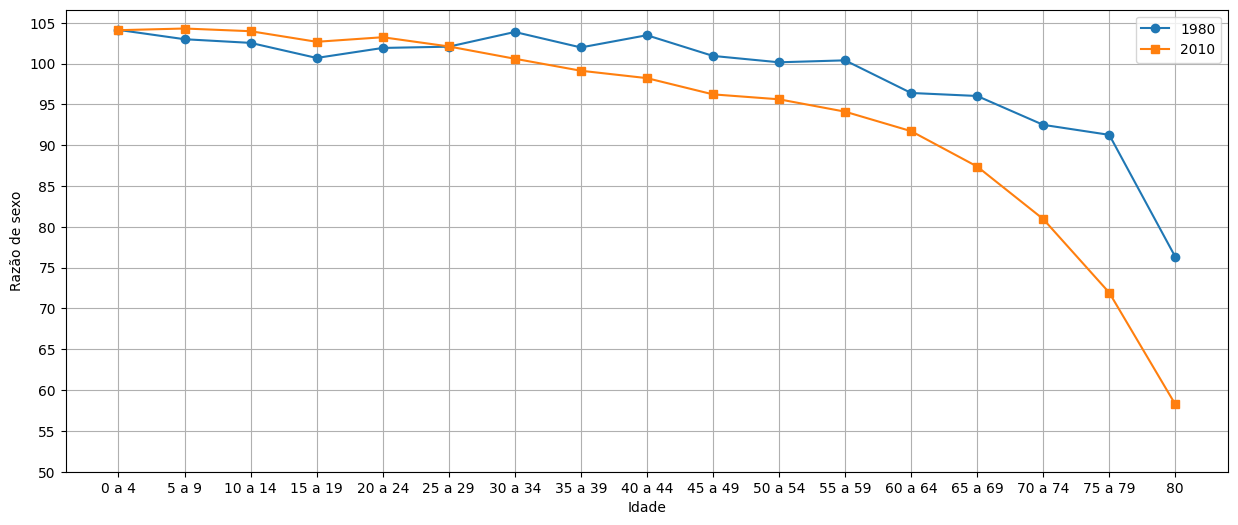

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))
# ax.barh(male_df['Idade'], male_df['Count'], color='blue', label='Male')
# ax.barh(female_df['Idade'], -female_df['Count'], color='pink', label='Female')  # Use negative values to flip the bars
ax.plot(df_1980['Faixa Etária detalhada'].map(lambda x: x.split(' anos')[0]), df_1980['Razão de sexo'], marker='o', label='1980')
ax.plot(df_2010['Faixa Etária detalhada'].map(lambda x: x.split(' anos')[0]), df_2010['Razão de sexo'], marker='s', label='2010')

ax.set_xlabel('Idade')
ax.set_ylabel('Razão de sexo')
if COM_TITULO: ax.set_title('Razão de sexo por faixa etária da população de Santa Catarina nos anos 1980 e 2010 ', pad=20, fontsize=18)
ax.legend()

max_value = max(max(df_1980['Razão de sexo']), max(df_2010['Razão de sexo']))
min_value = min(min(df_1980['Razão de sexo']), min(df_2010['Razão de sexo']))

plt.yticks(np.arange(math.floor(min_value/10)*10, max_value+1, 5.0))
plt.grid(True)
plt.show()

## Pirâmides etárias

### Pirâmide etária (1980)

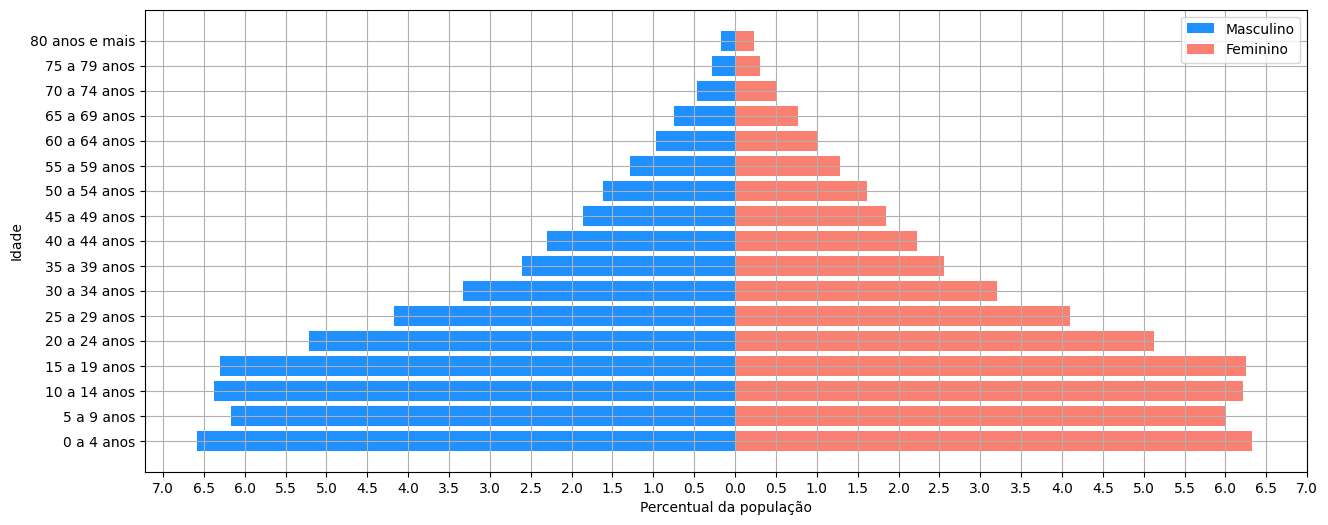

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.barh(df_1980['Faixa Etária detalhada'], -df_1980['Proporção pirâmide Masculino'], color='dodgerblue', label='Masculino')
ax.barh(df_1980['Faixa Etária detalhada'], df_1980['Proporção pirâmide Feminino'], color='salmon', label='Feminino')

ax.set_xlabel('Percentual da população')
ax.set_ylabel('Idade')
if COM_TITULO: ax.set_title('Distribuição da população por grupos etários de Santa Catarina nos anos 1980 e 2010', pad=20, fontsize=18)
ax.legend()


esquerda = math.floor(min(-df_1980['Proporção pirâmide Masculino']))
direita = max(df_1980['Proporção pirâmide Feminino'])+1
plt.xticks(np.arange(esquerda, direita, 0.5))

labels = [item.get_text()for item in ax.get_xticklabels()]
labels = [label.replace(MENOS_MISTERIOSO, '') for label in labels]
ax.set_xticklabels(labels)

plt.grid(True)
plt.show()

### Pirâmide etária (2010)

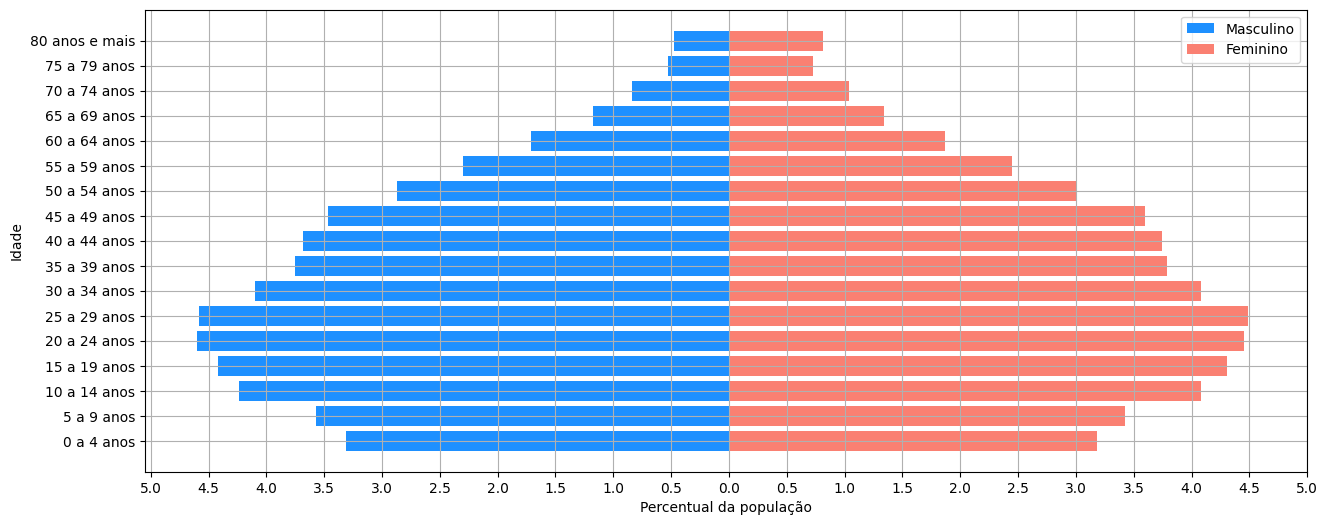

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.barh(df_2010['Faixa Etária detalhada'], -df_2010['Proporção pirâmide Masculino'], color='dodgerblue', label='Masculino')
ax.barh(df_2010['Faixa Etária detalhada'], df_2010['Proporção pirâmide Feminino'], color='salmon', label='Feminino')

ax.set_xlabel('Percentual da população')
ax.set_ylabel('Idade')
if COM_TITULO: ax.set_title('Distribuição da população por grupos etários de Santa Catarina nos anos 1980 e 2010', pad=20, fontsize=18)
ax.legend()


esquerda = math.floor(min(-df_2010['Proporção pirâmide Masculino']))
direita = max(df_2010['Proporção pirâmide Feminino'])+1
plt.xticks(np.arange(esquerda, direita, 0.5))

labels = [item.get_text()for item in ax.get_xticklabels()]
labels = [label.replace(MENOS_MISTERIOSO, '') for label in labels]
ax.set_xticklabels(labels)

plt.grid(True)
plt.show()

## Distribuição da população por grupos etários

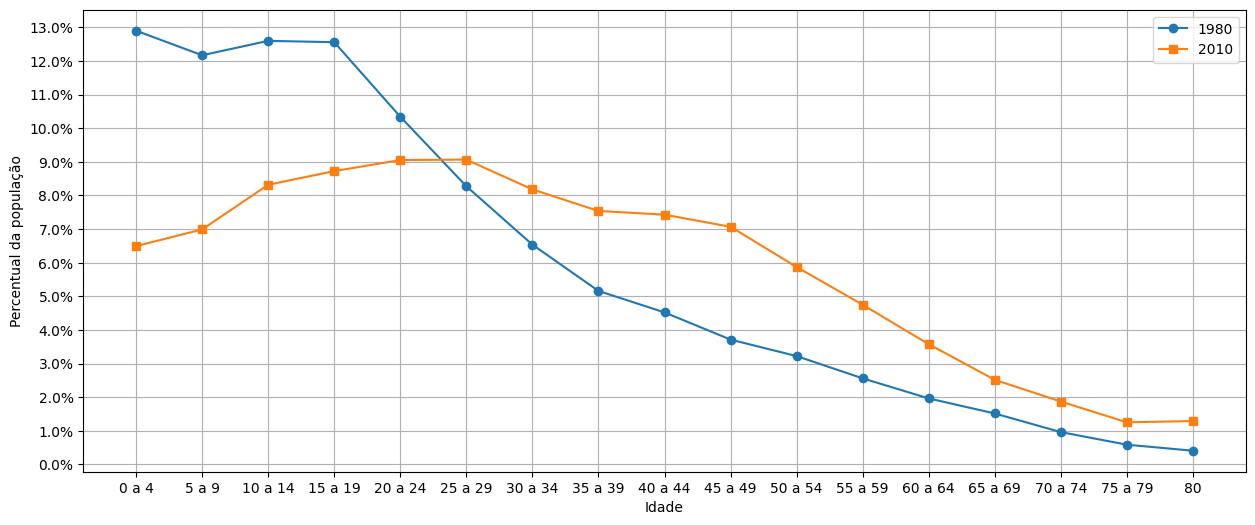

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
# ax.barh(male_df['Idade'], male_df['Count'], color='blue', label='Male')
# ax.barh(female_df['Idade'], -female_df['Count'], color='pink', label='Female')  # Use negative values to flip the bars
ax.plot(df_1980['Faixa Etária detalhada'].map(lambda x: x.split(' anos')[0]), df_1980['Proporção população'], marker='o', label='1980')
ax.plot(df_2010['Faixa Etária detalhada'].map(lambda x: x.split(' anos')[0]), df_2010['Proporção população'], marker='s', label='2010')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_xlabel('Idade')
ax.set_ylabel('Percentual da população')
if COM_TITULO: ax.set_title('Distribuição da população por grupos etários de Santa Catarina nos anos 1980 e 2010', pad=20, fontsize=18)
ax.legend()

max_value = max(max(df_1980['Proporção população']), max(df_2010['Proporção população']))

plt.yticks(np.arange(0, max_value+1, 1.0))
plt.grid(True)
plt.show()

## Razão de dependência (1980 e 2010)

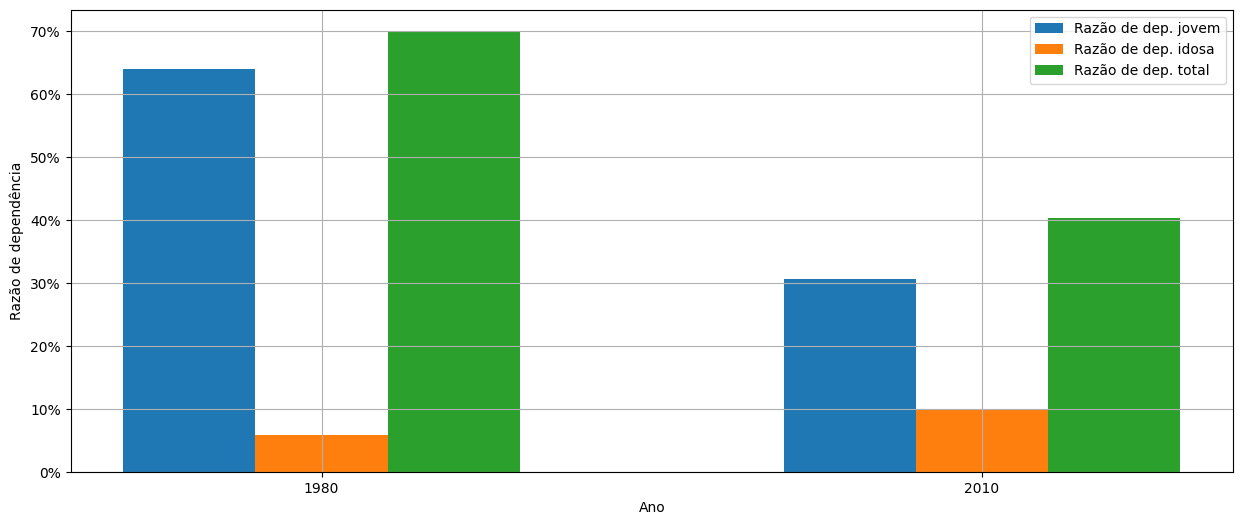

In [13]:
categorias = ['1980', '2010']

fig, ax = plt.subplots(figsize=(15, 6))
bar_width = 0.2
x = np.arange(len(categorias))

dep_jovem = [razao_dep_jovem_1980, razao_dep_jovem_2010]
dep_idosa = [razao_dep_idosa_1980, razao_dep_idosa_2010]
dep_total = [razao_dep_total_1980, razao_dep_total_2010]

ax.bar(x - bar_width, dep_jovem, bar_width, label='Razão de dep. jovem')
ax.bar(x , dep_idosa, bar_width, label='Razão de dep. idosa')
ax.bar(x + bar_width, dep_total, bar_width, label='Razão de dep. total')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Ano')
ax.set_ylabel('Razão de dependência')
if COM_TITULO: ax.set_title('Razão de dependência da população de Santa Catarina nos anos 1980 e 2010', pad=20, fontsize=18)
ax.legend()

plt.xticks(x, categorias)
plt.grid(True)
plt.show()

## Índice de idoso (1980 e 2010)

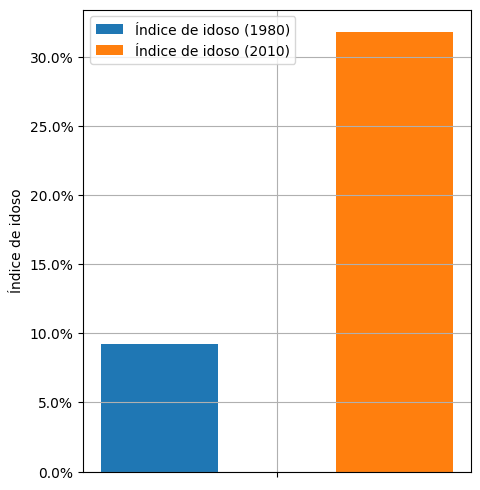

In [14]:
categorias = ['']

fig, ax = plt.subplots(figsize=(5, 6))
bar_width = 0.1
x = np.arange(0, len(categorias))

ax.bar(x - bar_width, [indice_idoso_1980], bar_width, label='Índice de idoso (1980)')
ax.bar(x + bar_width, [indice_idoso_2010], bar_width, label='Índice de idoso (2010)')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_xlabel('')
ax.set_ylabel('Índice de idoso')
if COM_TITULO: ax.set_title('Índice de idoso da população de Santa Catarina nos anos 1980 e 2010', pad=20, fontsize=18)
ax.legend()

plt.xticks(x, categorias)
plt.grid(True)
plt.show()